# Entrega 1

### Integrantes:

* Chiabotto Lorenzo
* Bertone Matias
* Storani Gianfranco

### Dataset
[HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv)



#### Dataset sample

In [164]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('./dataset/aug_train.csv')

#train.sample(10)

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

# 1. Listado de variables

* **enrollee_id** : ID unico para cada candidato. *(No se utiliza)*

* **city**: Codigo de la ciudad. *(Variable de entrada)*

* **city_development_index** : Indice de desarrollo de la ciudad. *(Variable de entrada)*

* **gender**: Genero. *(Variable de entrada)*

* **relevent_experience**: Si el candiato tiene experiencia relevante en el area de la nueva empresa. *(Variable de entrada)*

* **enrolled_university**: Tipo de curso universitario matriculado. *(Variable de entrada)*
 
* **education_level**: Nivel de educacion del candidato. *(Variable de entrada)*

* **major_discipline** :Disciplina principal del candidato. *(Variable de entrada)*

* **experience**: Experiencia total del candidato en años. *(Variable de entrada)*

* **company_size**: Cantidad de empleados actuales en la compania. *(Variable de entrada)*

* **company_type** : Tipo de compania. *(Variable de entrada)*

* **lastnewjob**: Diferencia en años entre su trabajo previo y el acutal. *(Variable de entrada)*

* **training_hours**: Horas de entrenamiento completadas. *(Variable de entrada)*

* **target**: 0 – No esta buscando un cambio de laburo, 1 – Esta buscando un cambio de laburo. *(Variable de salida)*

# 2.  Análisis detallado

### Balanceo

<AxesSubplot:ylabel='target'>

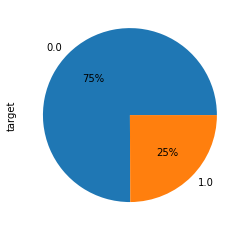

In [137]:
train.target.value_counts().plot.pie(autopct='%1.0f%%', figsize=(4,4))

Como se puede ver en el gráfico el dataset se encuentra altamente desbalanceado, ya que tiene una proporcion de 3 a 1 siendo el mayor de estos el valor 0 (La persona no esta buscando un cambio de trabajo).
Esto repercutira al momento de separar el dataset en test y train, ya que al tener un modelo tan desbalanceado podria darse el caso en el cual ambos dataset resultantes obtengan una distribucion muy diferente al original y por ende entre ellos mismos.


### Relacion variables de entrada / salida

#### City

<AxesSubplot:title={'center':'% Personas buscando trabajo por ciudad'}>

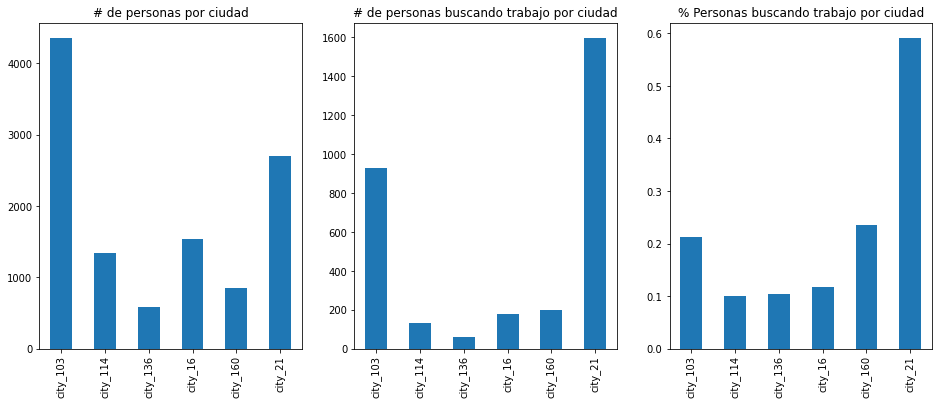

In [131]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de personas por ciudad')
train.city.value_counts()[train.city.value_counts() > 500].sort_index().plot.bar(ax=ax[0])


ax[1].set_title('# de personas buscando trabajo por ciudad')
train[train.target == True].city.value_counts()[train.city.value_counts() > 500].sort_index().plot.bar(ax=ax[1])


ax[2].set_title('% Personas buscando trabajo por ciudad')
(train[train.target == True].city.value_counts()[train.city.value_counts() > 500].sort_index() / train.city.value_counts()[train.city.value_counts() > 500].sort_index()).plot.bar(ax=ax[2])


#### City_index

<AxesSubplot:title={'center':'% Personas buscando trabajo por indice de desarrollo'}>

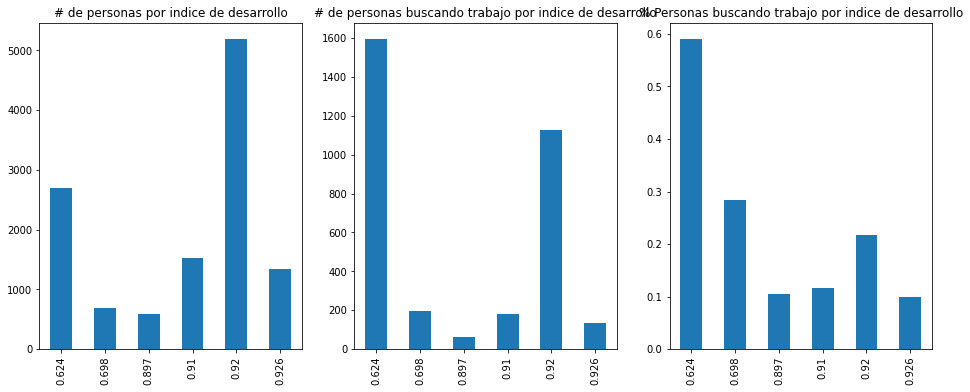

In [136]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# de personas por indice de desarrollo')
train.city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index().plot.bar(ax=ax[0])


ax[1].set_title('# de personas buscando trabajo por indice de desarrollo')
train[train.target == True].city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index().plot.bar(ax=ax[1])


ax[2].set_title('% Personas buscando trabajo por indice de desarrollo')
(train[train.target == True].city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index() / train.city_development_index.value_counts()[train.city_development_index.value_counts() > 500].sort_index()).plot.bar(ax=ax[2])


#### Company_type

<AxesSubplot:title={'center':'% Personas buscando trabajo por tipo de empresa'}>

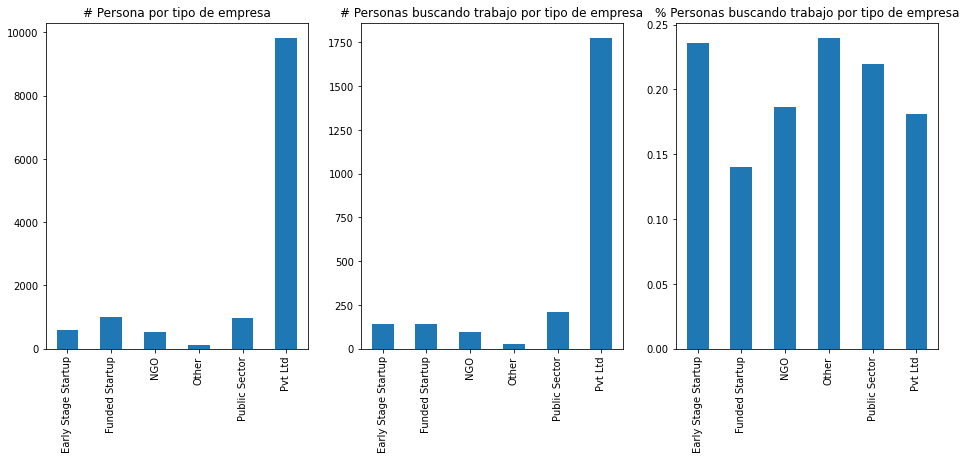

In [52]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por tipo de empresa')
train.company_type.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por tipo de empresa')
train[train.target == True].company_type.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por tipo de empresa')
(train[train.target == True].company_type.value_counts().sort_index() / train.company_type.value_counts().sort_index()).plot.bar(ax=ax[2])

#### Relevant_experience

<AxesSubplot:title={'center':'% Personas buscando trabajo por experiencia'}>

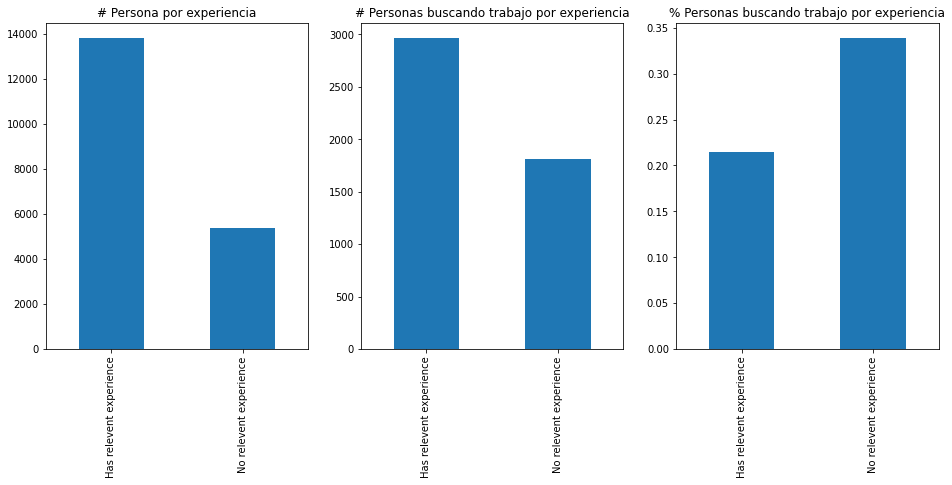

In [54]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por experiencia')
train.relevent_experience.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por experiencia')
train[train.target == True].relevent_experience.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por experiencia')
(train[train.target == True].relevent_experience.value_counts().sort_index() / train.relevent_experience.value_counts().sort_index()).plot.bar(ax=ax[2])

#### Experience

<AxesSubplot:title={'center':'% Personas buscando trabajo por experiencia'}>

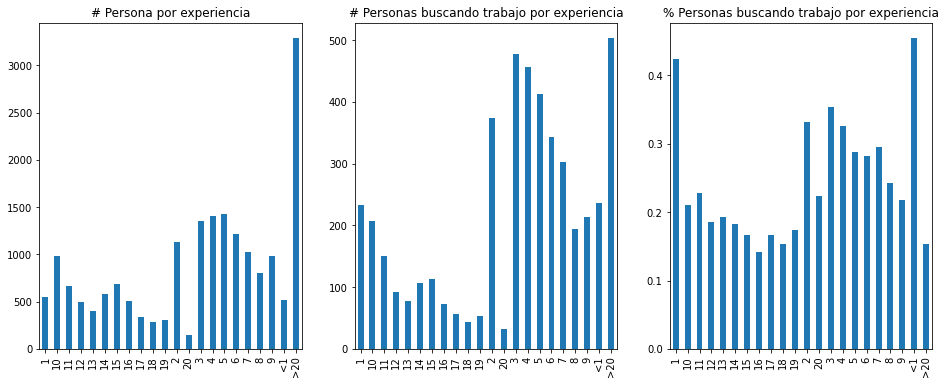

In [56]:
f,ax=plt.subplots(1,3,figsize=(16,6))
ax[0].set_title('# Persona por experiencia')
train.experience.value_counts().sort_index().plot.bar(ax=ax[0])

ax[1].set_title('# Personas buscando trabajo por experiencia')
train[train.target == True].experience.value_counts().sort_index().plot.bar(ax=ax[1])

ax[2].set_title('% Personas buscando trabajo por experiencia')
(train[train.target == True].experience.value_counts().sort_index() / train.experience.value_counts().sort_index()).plot.bar(ax=ax[2])

In [173]:
#train.major_discipline.unique()
#train.education_level.unique()
#train.relevent_experience.unique()
#train.gender.unique()
#train.enrolled_university.unique()
#train.company_type.unique()

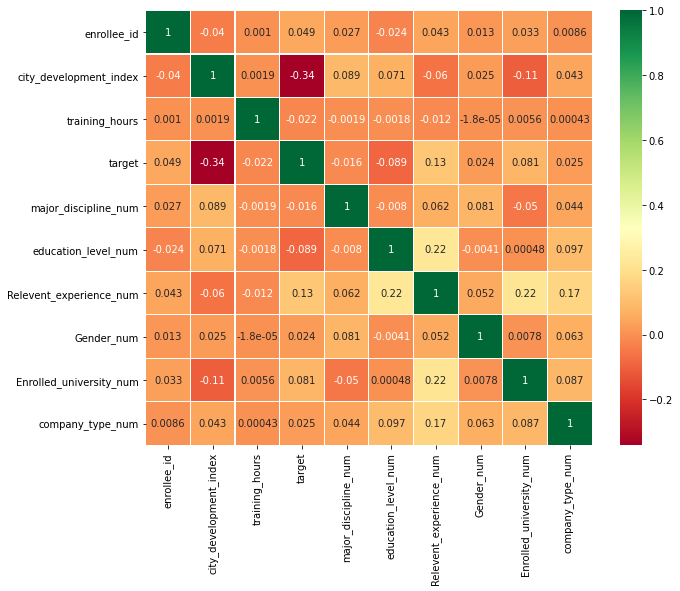

In [174]:
train["major_discipline_num"] = train.major_discipline.replace(['STEM', 'Business Degree', 'nan', 'Arts', 'Humanities', 'No Major','Other'], [0, 1,2,3,4,5,6])
train["education_level_num"] = train.education_level.replace(['Graduate', 'Masters', 'High School', 'nan', 'Phd', 'Primary School'], [0, 1,2,3,4,5])
train["Relevent_experience_num"] = train.relevent_experience.replace(['Has relevent experience', 'No relevent experience'], [0, 1])
train["Gender_num"] = train.gender.replace(['Male', 'nan', 'Female', 'Other'], [0, 1,2,3])
train["Enrolled_university_num"] = train.enrolled_university.replace(['no_enrollment', 'Full time course', 'nan', 'Part time course'], [0, 1,2,3])
train["company_type_num"] = train.company_type.replace(['nan', 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other','Public Sector', 'NGO'], [0, 1,2,3,4,5,6])

sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()